Best Lambda: 0

GD Train Metrics: {'accuracy': 0.9103260869565217, 'precision': 0.914958238420653, 'recall': 0.8468025298664793, 'f1': 0.8795620437956204}
GD Test Metrics : {'accuracy': 0.9066232356134636, 'precision': 0.9245810055865922, 'recall': 0.8487179487179487, 'f1': 0.8850267379679144}

SGD Train Metrics: {'accuracy': 0.9296195652173913, 'precision': 0.9235807860262009, 'recall': 0.8917779339423753, 'f1': 0.9074007865570254}
SGD Test Metrics : {'accuracy': 0.9142236699239956, 'precision': 0.9146666666666666, 'recall': 0.8794871794871795, 'f1': 0.8967320261437909}


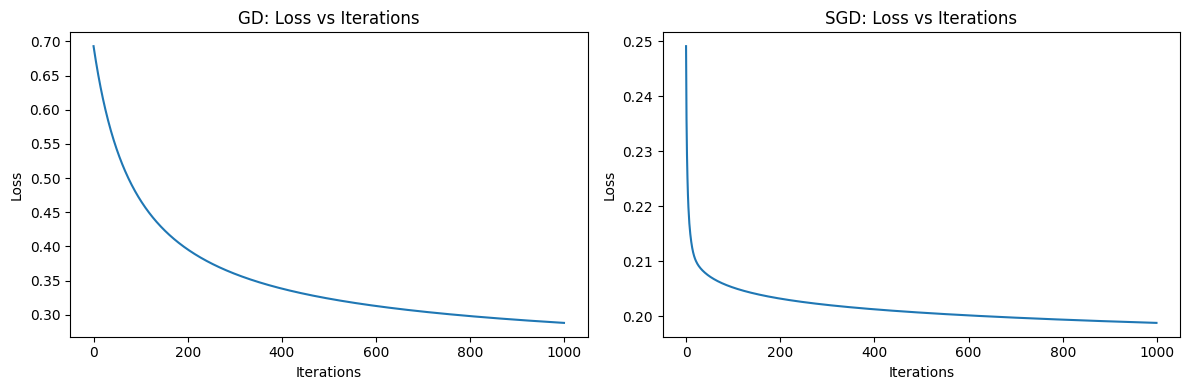

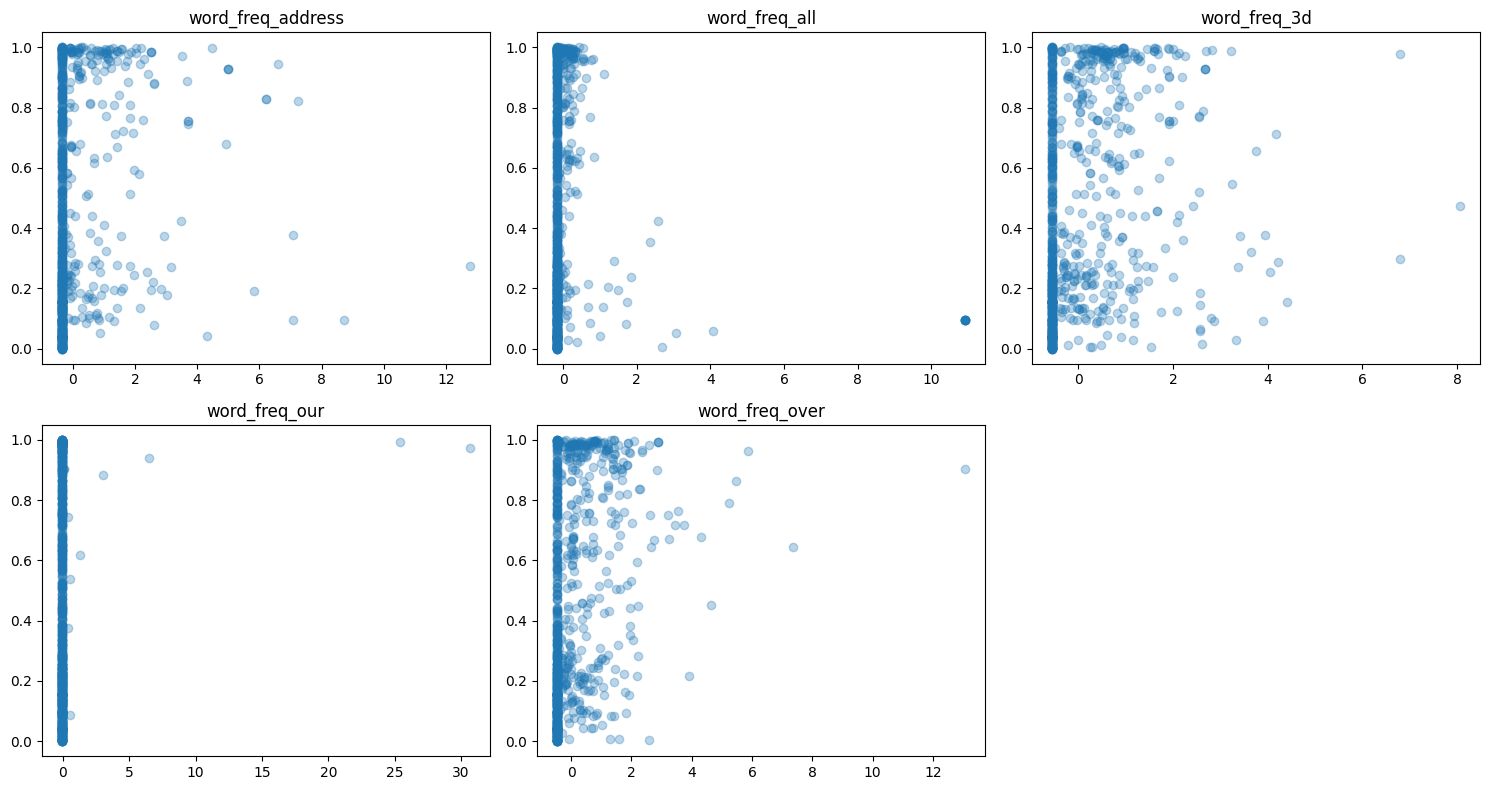


Predictions for 5 emails from spam_ham dataset:
Email 1 -> Predicted Label: Ham
Email 2 -> Predicted Label: Ham
Email 3 -> Predicted Label: Ham
Email 4 -> Predicted Label: Spam
Email 5 -> Predicted Label: Ham


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_loss(y, y_hat, lambda_, w):
    m = len(y)
    eps = 1e-9
    log_loss = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    l2 = (lambda_ / (2 * m)) * np.sum(w[1:] ** 2)
    return log_loss + l2


def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }


class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, lambda_=0.0, method="gd"):
        self.lr = lr
        self.epochs = epochs
        self.lambda_ = lambda_
        self.method = method
        self.w = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)

        for epoch in range(self.epochs):
            if self.method == "gd":
                y_hat = sigmoid(X @ self.w)
                grad = (1 / m) * (X.T @ (y_hat - y))
                grad[1:] += (self.lambda_ / m) * self.w[1:]
                self.w -= self.lr * grad

                loss = compute_loss(y, y_hat, self.lambda_, self.w)
                self.losses.append(loss)

            else:  # SGD
                for i in range(m):
                    # xi = X[i].reshape(1, -1)
                    # yi = y[i]
                    # y_hat = sigmoid(xi @ self.w)
                    # grad = xi.T * (y_hat - yi)
                    # grad[1:] += (self.lambda_ / m) * self.w[1:]
                    # self.w -= self.lr * grad.flatten()
                    xi = X[i]                 # shape: (n,)
                    yi = y[i]

                    y_hat = sigmoid(np.dot(xi, self.w))
                    error = y_hat - yi

                    grad = error * xi         # shape: (n,)
                    grad[1:] += (self.lambda_ / m) * self.w[1:]

                    self.w -= self.lr * grad
                y_hat_full = sigmoid(X @ self.w)
                loss = compute_loss(y, y_hat_full, self.lambda_, self.w)
                self.losses.append(loss)

    def predict(self, X):
        probs = sigmoid(X @ self.w)
        return (probs >= 0.5).astype(int)


columns = [
    "word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
    "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
    "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
    "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
    "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
    "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
    "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
    "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
    "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re",
    "word_freq_edu","word_freq_table","word_freq_conference",
    "char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#",
    "capital_run_length_average","capital_run_length_longest","capital_run_length_total",
    "label"
]

data = pd.read_csv("spambase.data", header=None, names=columns)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

#splitting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

#L2 regularization

lambdas = [0, 0.01, 0.1, 1]
best_lambda = None
best_val_acc = 0

for l in lambdas:
    model = LogisticRegressionScratch(lr=0.01, epochs=500, lambda_=l, method="gd")
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)

    if acc > best_val_acc:
        best_val_acc = acc
        best_lambda = l

print("Best Lambda:", best_lambda)

#training the models

gd_model = LogisticRegressionScratch(
    lr=0.01, epochs=1000, lambda_=best_lambda, method="gd"
)
sgd_model = LogisticRegressionScratch(
    lr=0.01, epochs=1000, lambda_=best_lambda, method="sgd"
)

gd_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

#metrics

for name, model in [("GD", gd_model), ("SGD", sgd_model)]:
    print(f"\n{name} Train Metrics:", compute_metrics(y_train, model.predict(X_train)))
    print(f"{name} Test Metrics :", compute_metrics(y_test, model.predict(X_test)))

# loss plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(gd_model.losses)
axes[0].set_title("GD: Loss vs Iterations")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Loss")

axes[1].plot(sgd_model.losses)
axes[1].set_title("SGD: Loss vs Iterations")
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()


#feature vs prediction scatterplots

y_probs = sigmoid(X_test @ gd_model.w)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i in range(1, 6):
    axes[i-1].scatter(X_test[:, i], y_probs, alpha=0.3)
    axes[i-1].set_title(columns[i])

# hide remaining axes
for ax in axes[5:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


spam_ham = pd.read_csv("spam_ham_dataset.csv")

print("\nPredictions for 5 emails from spam_ham dataset:")
for i in range(5):
    print(f"Email {i+1} -> Predicted Label:",
          "Spam" if gd_model.predict(X_test[i].reshape(1, -1))[0] == 1 else "Ham")
